In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = "train" #passing the path with training images
test_dir = "test"   #passing the path with testing images

In [3]:
img_size = 48 #original size of the image

In [4]:

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 40228 images belonging to 5 classes.
Found 2477 images belonging to 5 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras import regularizers
from tensorflow.keras.optimizers import Adam

# Membuat model Sequential
model = Sequential()

# Input layer
model.add(Input(shape=(48, 48, 1)))  # Menggunakan Input layer untuk mendefinisikan bentuk input
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))

# Hidden layers
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Menggunakan argumen learning_rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Menampilkan arsitektur model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [9]:
# Training model dengan EarlyStopping
batch_size = 64
history = model.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=100,  # Maksimum jumlah epoch
    callbacks=[early_stopping]
)

Epoch 1/100
629/629 [==============================] - 322s 508ms/step - loss: 8.5540 - accuracy: 0.2759 - val_loss: 7.8612 - val_accuracy: 0.2923
Epoch 2/100
629/629 [==============================] - 280s 446ms/step - loss: 6.9309 - accuracy: 0.3489 - val_loss: 6.0330 - val_accuracy: 0.4215
Epoch 3/100
629/629 [==============================] - 299s 475ms/step - loss: 5.4291 - accuracy: 0.4014 - val_loss: 4.6948 - val_accuracy: 0.4433
Epoch 4/100
629/629 [==============================] - 292s 464ms/step - loss: 4.2155 - accuracy: 0.4510 - val_loss: 3.5974 - val_accuracy: 0.5111
Epoch 5/100
629/629 [==============================] - 289s 459ms/step - loss: 3.3227 - accuracy: 0.4843 - val_loss: 2.8547 - val_accuracy: 0.5523
Epoch 6/100
629/629 [==============================] - 292s 464ms/step - loss: 2.6918 - accuracy: 0.5173 - val_loss: 2.4090 - val_accuracy: 0.5369
Epoch 7/100
629/629 [==============================] - 305s 485ms/step - loss: 2.2383 - accuracy: 0.5445 - val_loss: 2

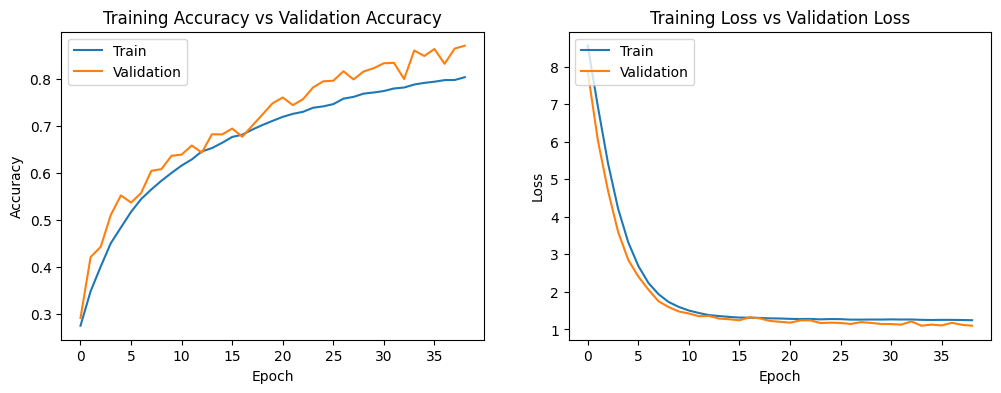

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

39/39 [==============================] - 18s 454ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14       383
        fear       0.18      0.18      0.18       408
       happy       0.30      0.31      0.31       719
     neutral       0.22      0.22      0.22       490
         sad       0.23      0.23      0.23       477

    accuracy                           0.23      2477
   macro avg       0.21      0.21      0.21      2477
weighted avg       0.23      0.23      0.23      2477

Precision: 0.2269
Recall: 0.2277
F1 Score: 0.2273


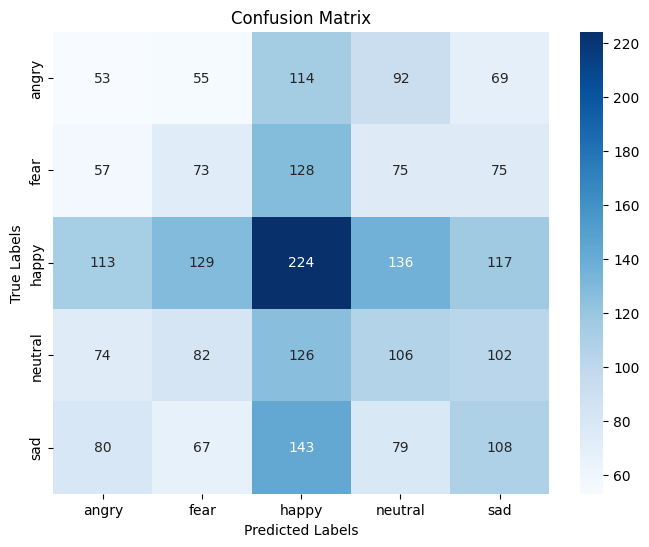

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Mengambil label ground truth dan prediksi dari generator validasi
validation_generator.reset()
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Mendapatkan prediksi dari model
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Menghitung metrik evaluasi
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [12]:
model.save('expression_recognition.h5')

1/1 [==============================] - 0s 24ms/step


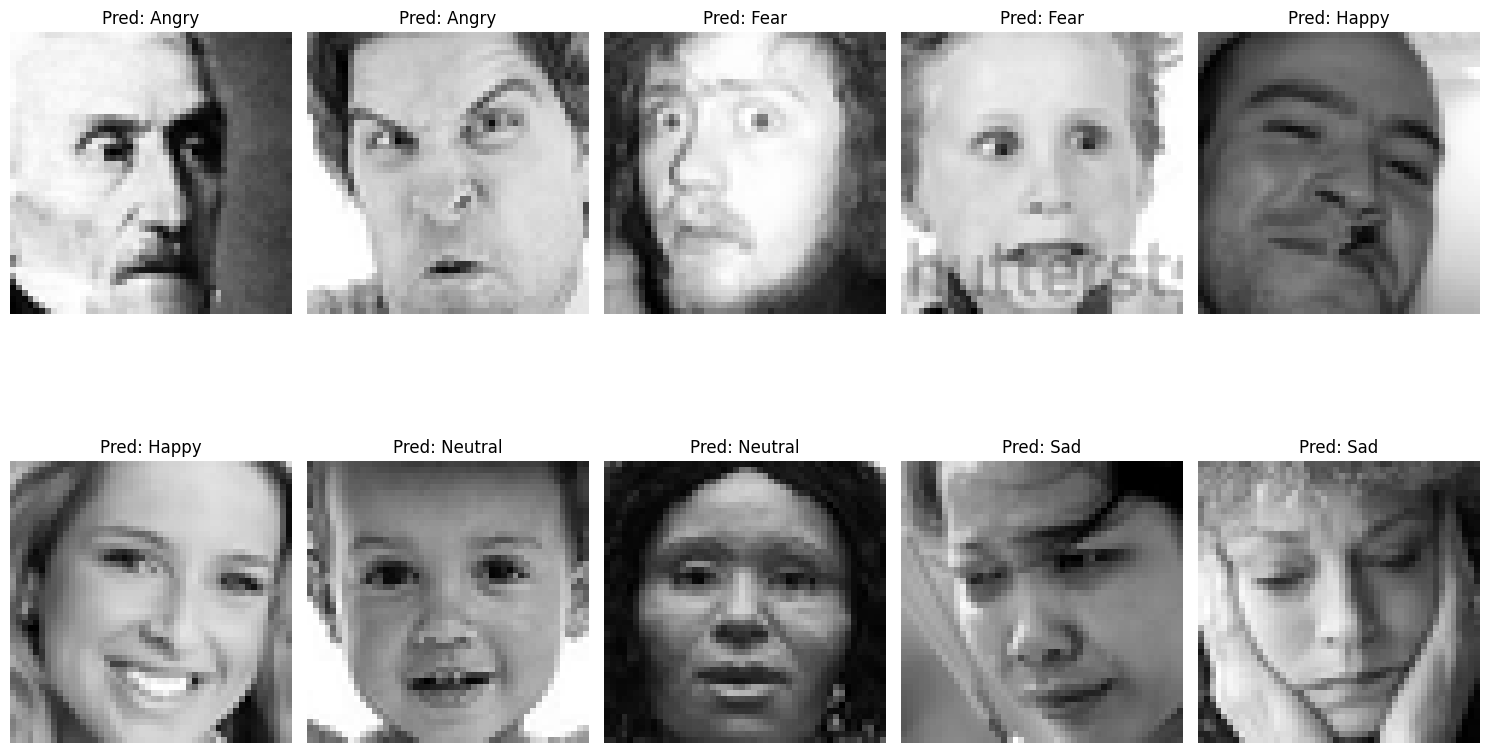

Image: valid\angry1.png
Predicted Class: Angry (Probability: 0.4821)

Image: valid\angry2.png
Predicted Class: Angry (Probability: 0.9483)

Image: valid\fear1.png
Predicted Class: Fear (Probability: 0.9009)

Image: valid\fear2.png
Predicted Class: Fear (Probability: 0.9988)

Image: valid\happy1.png
Predicted Class: Happy (Probability: 0.9920)

Image: valid\happy2.png
Predicted Class: Happy (Probability: 0.9512)

Image: valid\netral1.png
Predicted Class: Neutral (Probability: 0.7708)

Image: valid\netral2.png
Predicted Class: Neutral (Probability: 0.8560)

Image: valid\sad1.png
Predicted Class: Sad (Probability: 0.5180)

Image: valid\sad2.png
Predicted Class: Sad (Probability: 0.5929)



In [15]:
from tensorflow.keras.utils import load_img, img_to_array  # Perbaikan impor
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi untuk memuat dan memprediksi gambar
def predict_emotions_from_folder(model, folder_path, target_size=(48, 48), class_labels=None):
    predictions = []
    plt.figure(figsize=(15, 10))

    # Daftar file gambar dari folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for i, img_path in enumerate(img_paths[:10]):  # Membatasi hanya 10 gambar
        # Memuat gambar dan mengubah ukurannya
        img = load_img(img_path, target_size=target_size, color_mode="grayscale")  # Perbaikan di sini
        img_array = img_to_array(img) / 255.0  # Normalisasi
        img_array = np.expand_dims(img_array, axis=0)  # Menambahkan batch dimension
        
        # Membuat prediksi
        pred = model.predict(img_array)
        pred_class = np.argmax(pred, axis=1)[0]
        predictions.append((img_path, pred_class, pred[0]))
        
        # Menampilkan gambar dan prediksinya
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_array[0].squeeze(), cmap='gray')  # Konversi array untuk visualisasi
        plt.title(f"Pred: {class_labels[pred_class]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    return predictions

# Path ke folder gambar
folder_path = "valid"

# Label kelas (ganti sesuai class_indices dari data Anda)
class_labels = {0:'Angry',1:'Fear',2:'Happy',3:'Neutral',4:'Sad'}

# Memanggil fungsi untuk memprediksi gambar dari folder
predictions = predict_emotions_from_folder(model, folder_path, target_size=(48, 48), class_labels=class_labels)

# Menampilkan hasil prediksi
for img_path, pred_class, pred_prob in predictions:
    print(f"Image: {img_path}")
    print(f"Predicted Class: {class_labels[pred_class]} (Probability: {pred_prob[pred_class]:.4f})")
    print()


In [16]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

39/39 [==============================] - 5s 117ms/step - loss: 1.0994 - accuracy: 0.8595
final train accuracy = 88.96 , validation accuracy = 85.95


In [17]:
model.save_weights('expression_recognition_weights_new.h5')